In [1]:
library(tidyverse)
library(magrittr)
library(here)
library(bdkn)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.0  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.2       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract

here() starts at /Users/martin_petr/projects/ychr

Attaching package: ‘bdkn’

The following object is masked from ‘package:ggplot2’:

    %+%



In [2]:
devtools::load_all(".")

Loading ychr


In [3]:
files <- list.files(here("data/coalsims"), ".tsv$", full.names = TRUE)

In [5]:
calculate_tmrca <- function(gt) {
    samples <- read_siminfo(gt)

    tAfrRef <- calculate_tAfrRef(gt, samples) %>% select(afr, emh, starts_with("tmrca"), mut_rate, everything())
    tArchRef <- calculate_tArchRef(gt, samples, tAfrRef)

    tArchRef %>%
        summarise_at(vars(starts_with("tmrca"), mut_rate), mean)
}

In [12]:
df <- list.files(here("data/coalsims"), ".tsv$", full.names = TRUE) %>%
map_dfr(function(f) {
    map_dfr(seq(0, 0.1, 0.01), function(e) {
        gt <- read_simgt(f) %>% add_errors(e, "arch0")
        calculate_tmrca(gt) %>%
            mutate(error_rate = e,
                   true_split = split_time <- basename(f) %>% str_replace("archsplit(\\d+)_.*.tsv", "\\1") %>% as.integer,
                   rep = basename(f) %>% str_replace("archsplit\\d+_rep(\\d+).tsv", "\\1") %>% as.integer)
    })
})

In [101]:
x = .Last.value

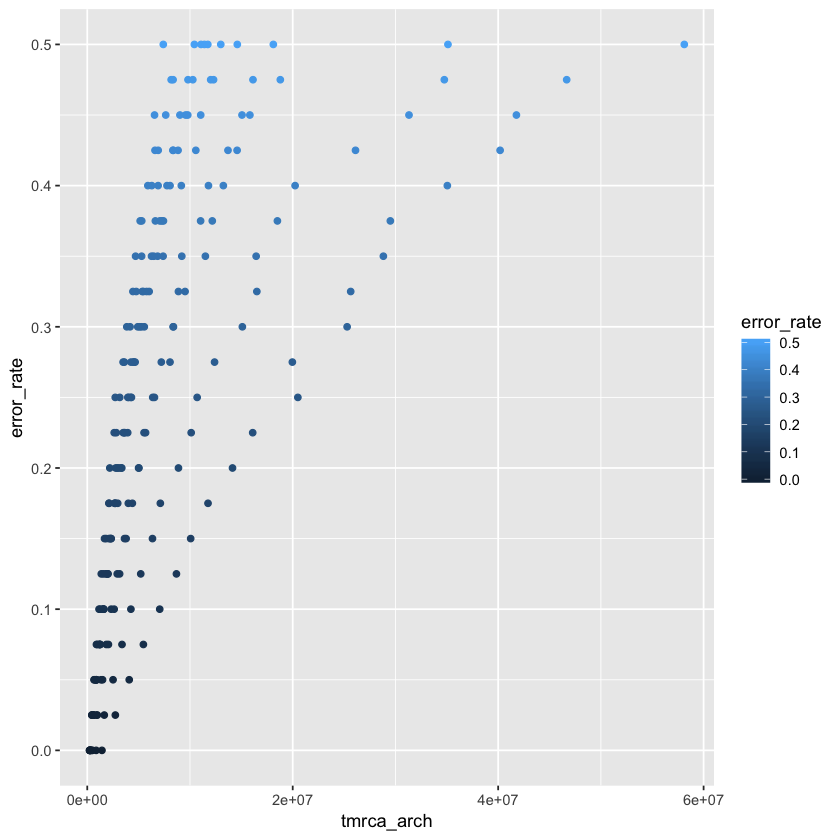

In [104]:
x %>% ggplot(aes(tmrca_arch, error_rate, color = error_rate)) + geom_point()

In [54]:
gt <- read_simgt("../data/coalsims/archsplit600000.tsv")

In [55]:
samples <- read_siminfo(gt)

In [56]:
tAfrRef <- calculate_tAfrRef(gt, samples) %>% select(afr, emh, starts_with("tmrca"), mut_rate, everything())

In [57]:
tAfrRef %>% group_by(afr) %>% summarise_if(is.numeric, mean)

afr,tmrca_ad,tmrca_f,tmrca_avg,mut_rate,a,b,c,d,e,f,total,age,muts_per_year
afr0,280673.1,339807.7,310240.4,3.016095e-11,43,0,0,9.5,0,62,6999484,45000,0.0002111111


In [58]:
tArchRef <- calculate_tArchRef(gt, samples, tAfrRef)

In [59]:
tArchRef %>% group_by(arch) %>% summarise_if(is.numeric, mean)

arch,tmrca_arch,alpha,mut_rate,tmrca_ad,tmrca_f,tmrca_avg,a,b,c,d,e,f,total,p
arch0,798028.8,2.556039,3.016095e-11,280673.1,339807.7,310240.4,89,0,0,52.5,62,112,6999484,0.4374758
